# Import Library

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from adjustText import adjust_text
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Dataset

In [2]:
# LOAD DATASET

anime_data = pd.read_table(r'Anime-Dataset/anime.csv', sep=',')
rating_data = pd.read_table(r'Anime-Dataset/rating.csv', delimiter=',')

# DISPLAY SHAPE
anime_data.shape , rating_data.shape

((12294, 7), (7813737, 3))

In [3]:
# DISPLAY SOME DATA

print(f'Anime Data : ')
display(anime_data)

print(f'Rating Data : ')
display(rating_data)

Anime Data : 


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Rating Data : 


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


# Exploratory Data Analysis (EDA)

In [4]:
display(anime_data.info())
display(rating_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


None

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


There's some null value on rating, type, genre columns. ok lets check it.

</div>

<Axes: >

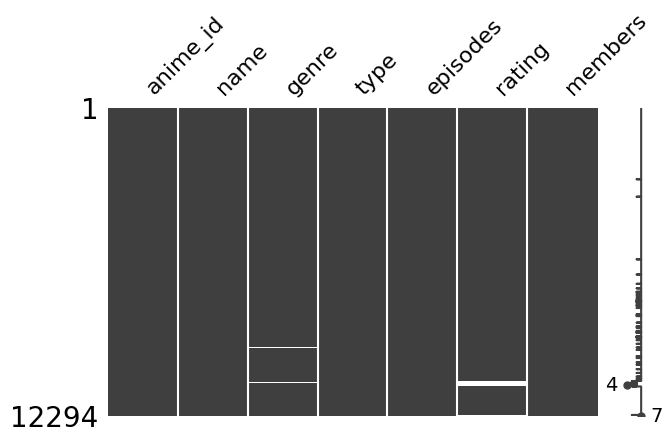

In [5]:
msno.matrix(df = anime_data, figsize=(7,4))

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


Because there are some data that have missing values, let's delete them.

</div>

In [6]:
# DELETE DATA IF GENRE AND TYPE ANIME IS NULL
anime_data = anime_data.dropna(subset=['genre', 'type']).reset_index(drop=True)

# FILL THE MISSING RATING VALUES WITH VALUE 0
anime_data = anime_data.fillna(value= 0).reset_index(drop=True)

anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210 entries, 0 to 12209
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 667.9+ KB


In [7]:
# PREPROCESSING

# CONVERT GENRE TO LIST OF STRINGS
anime_data['genre_split'] = anime_data['genre'].apply(lambda x : x.split(', ')) 

# CONVERT TO NUMERIC DATA TYPE
anime_data['episodes'] = pd.to_numeric(arg = anime_data['episodes'], errors='coerce')    
anime_data.fillna(value= 0, inplace=True)  # FILL MISSING VALUE IN EPISODES COLUMN

anime_data

,anime_id,name,genre,type,episodes,rating,members,genre_split
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12205,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,[Hentai]
12206,5543,Under World,Hentai,OVA,1.0,4.28,183,[Hentai]
12207,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,[Hentai]
12208,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,[Hentai]


-------------------------------------------------------------------------------------------

In [8]:
# CHECK DUPLICATED DATA

display(anime_data.duplicated(subset=['name']).sum())  
display(rating_data.duplicated().sum())

# DROP DUPLICATED 
anime_data.drop_duplicates(subset=['name'], inplace=True)
anime_data = anime_data.reset_index(drop=True)

2

1

In [9]:
# CHECK UNIQUE CLASS

anime_data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

## Univariate Analysis

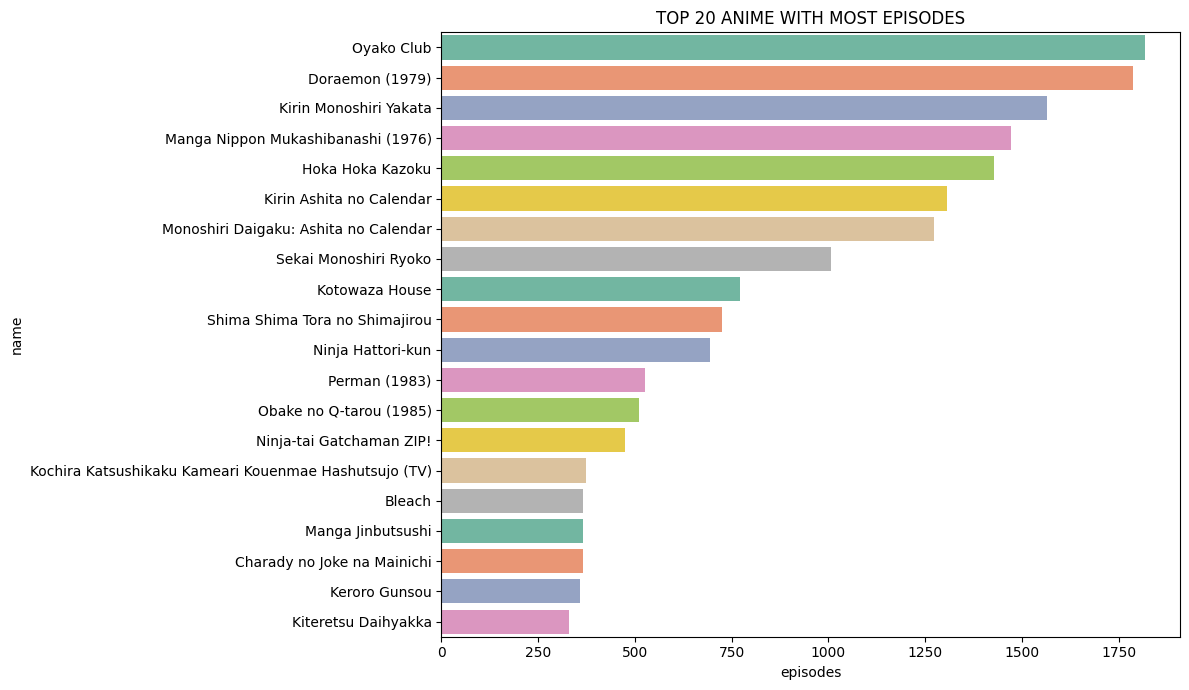

In [12]:
# DISPLAY ANIME WITH MOST EPISODE


anime_most_episodes = anime_data.sort_values(by= 'episodes', ascending=False)  # SORT EPISODES BY DESCENDING
anime_most_episodes = anime_most_episodes.head(20)      # GET ONLY TOP 10 ANIME WITH MOST EPISODES


# BAR CHART
plt.figure(figsize=(12,7))

sns.barplot(data = anime_most_episodes, x = 'episodes', y= 'name', palette='Set2', hue = 'name')
plt.title('TOP 20 ANIME WITH MOST EPISODES')

plt.tight_layout()
plt.show()

C:\Users\aliff\AppData\Local\Temp\ipykernel_592\2759647025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = anime_type.index, y = anime_type.values, palette='Set3')


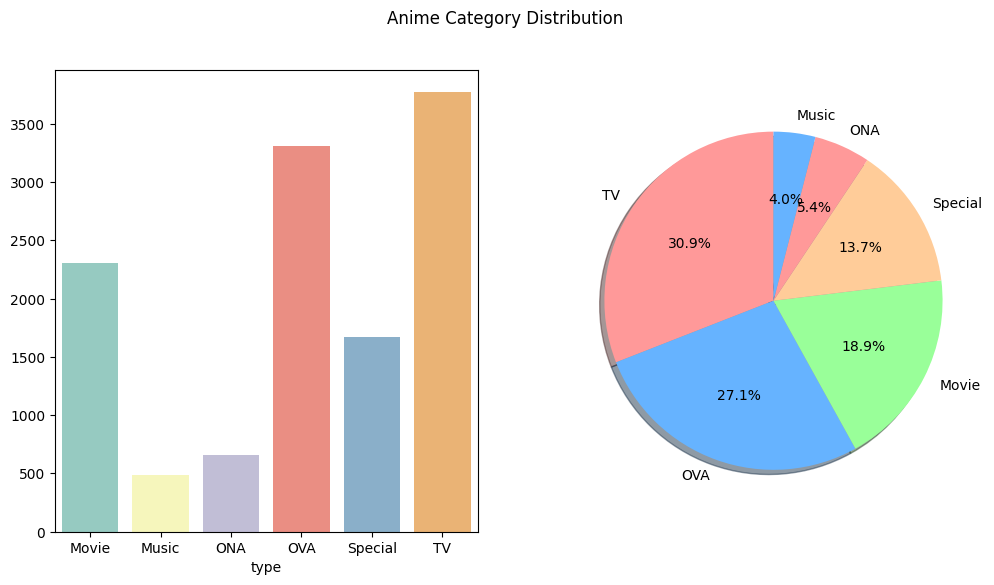

In [11]:
# DISPLAY DISTRIBUTION ANIME BY TYPE

anime_type = anime_data.groupby(by='type')['name'].count()

plt.figure(figsize=(12,6))

# VISUALIZE 
plt.subplot(1,2,1)
sns.barplot(x = anime_type.index, y = anime_type.values, palette='Set3')

plt.subplot(1,2,2)
type_counts = anime_data['type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.suptitle('Anime Category Distribution')
plt.show()

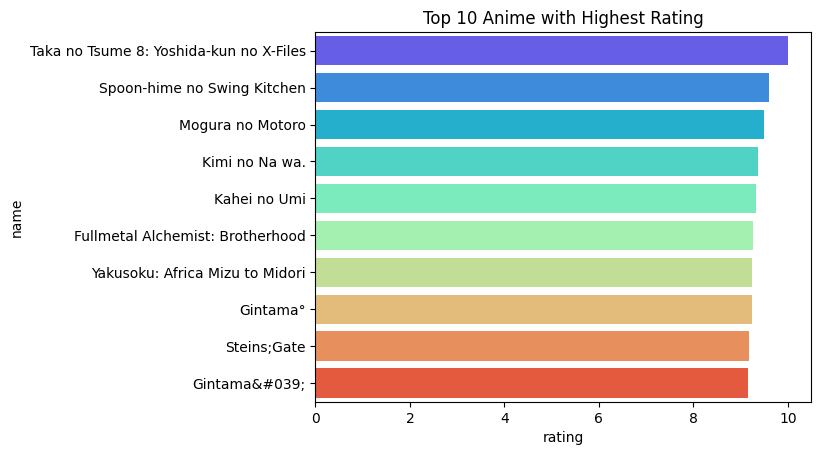

10 Anime with Highest Rating


,name,rating
10419,Taka no Tsume 8: Yoshida-kun no X-Files,10.00
10356,Spoon-hime no Swing Kitchen,9.60
9557,Mogura no Motoro,9.50
0,Kimi no Na wa.,9.37
9047,Kahei no Umi,9.33
1,Fullmetal Alchemist: Brotherhood,9.26
10739,Yakusoku: Africa Mizu to Midori,9.25
2,Gintama°,9.25
3,Steins;Gate,9.17
4,Gintama&#039;,9.16


In [ ]:
# DISPLAY ANIME WITH HIGHEST RATING

anime_high_rating = anime_data.sort_values(by = 'rating', ascending= False)
anime_high_rating = anime_high_rating.head(10)

sns.barplot(data= anime_high_rating[:10], x = 'rating', y= 'name', hue = 'name', palette = 'rainbow')
plt.title('Top 10 Anime with Highest Rating')
plt.show()

print('10 Anime with Highest Rating')
anime_high_rating[['name', 'rating']]

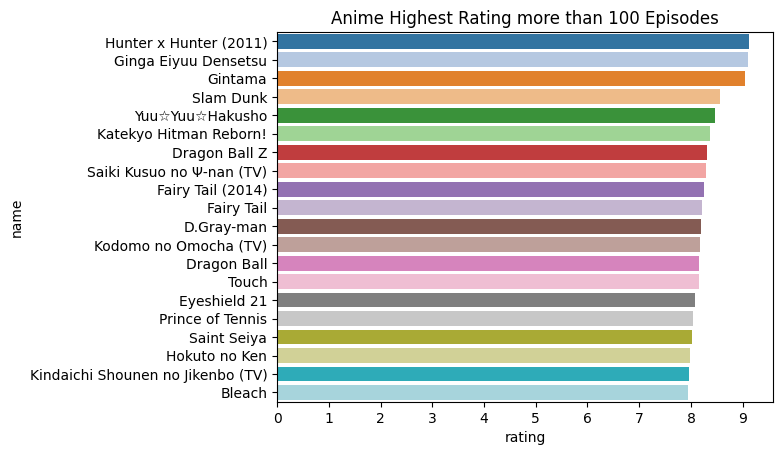

Anime with Highest Rating more than 100 Episodes


,name,rating
6,Hunter x Hunter (2011),9.13
7,Ginga Eiyuu Densetsu,9.11
12,Gintama,9.04
79,Slam Dunk,8.56
120,Yuu☆Yuu☆Hakusho,8.47
175,Katekyo Hitman Reborn!,8.37
206,Dragon Ball Z,8.32
232,Saiki Kusuo no Ψ-nan (TV),8.29
255,Fairy Tail (2014),8.25
288,Fairy Tail,8.22


In [20]:
# DISPLAY ANIME WITH HIGHEST RATING AND MORE THAN 100 EPISODES

anime_high_rating = anime_data.sort_values(by= 'rating', ascending=False)
anime_high_rating = anime_high_rating[anime_high_rating['episodes'] > 100]  # ONLY SHOW ANIME MORE THAN 100 EPISODES
anime_high_rating = anime_high_rating.head(20)

# VISUALIZATION
sns.barplot(data = anime_high_rating, x = 'rating', y = 'name', hue = 'name', palette = 'tab20')
plt.title('Anime Highest Rating more than 100 Episodes')

plt.xticks(ticks=range(0, int(anime_high_rating['rating'].max()) + 1, 1))
plt.show()

print('Anime with Highest Rating more than 100 Episodes')
anime_high_rating[['name', 'rating']]

C:\Users\aliff\AppData\Local\Temp\ipykernel_592\3157820878.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= popular_anime, x = 'members', y = 'name', palette='Set2')


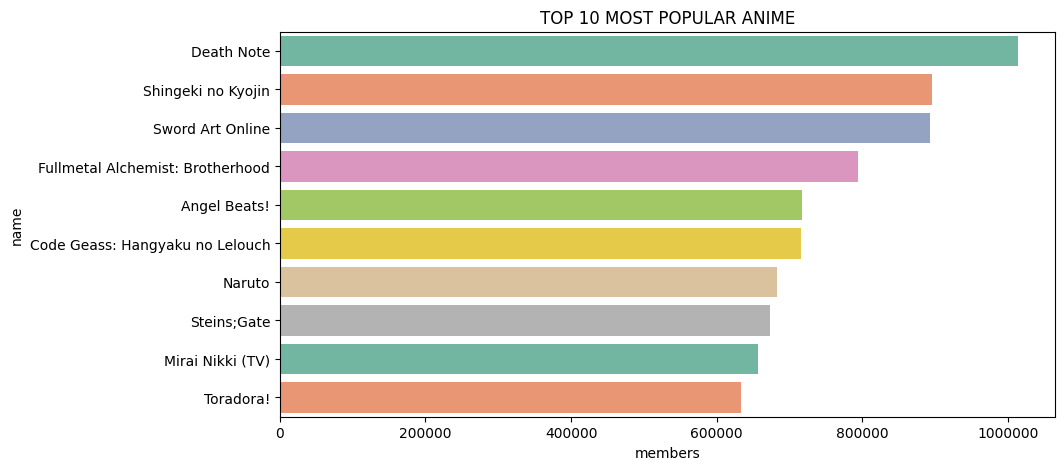

In [14]:
# DISPLAY MOST POPULAR ANIME

popular_anime = anime_data.sort_values(by = 'members', ascending=False)  # SORT TO DESCENDING
popular_anime = popular_anime.head(10)   # GET TOP 10

# VISUALIZATION
plt.figure(figsize=(10,5))
sns.barplot(data= popular_anime, x = 'members', y = 'name', palette='Set2')
plt.title('TOP 10 MOST POPULAR ANIME')

plt.ticklabel_format(style='plain', axis='x')   # so that the x-axis displays its original value (not scientific notation value)

plt.show()

### Check Distribution

C:\Users\aliff\AppData\Local\Temp\ipykernel_22864\2247045459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = genre_count['genre'], y = genre_count['frequency'], palette= 'tab20')


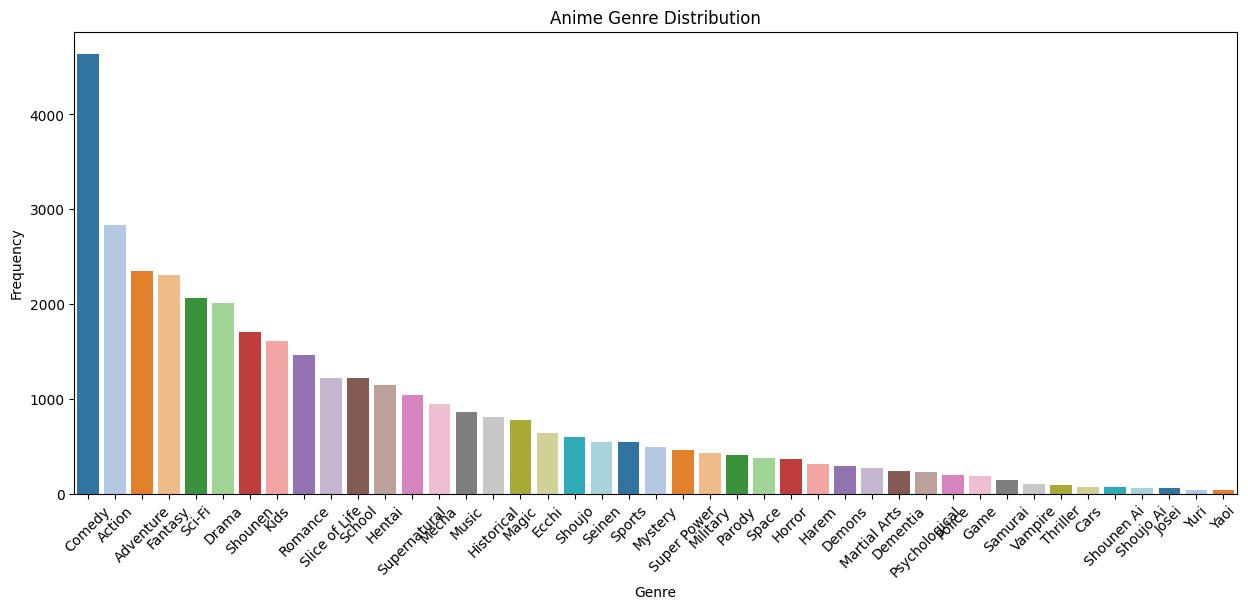

In [22]:
# CHECK GENRE DISTRIBUTION

genre_list = anime_data['genre'].apply(lambda x : x.split(', '))

all_genre = sum(genre_list, start = [])  # SPLIT INTO SINGLE STRING
genre_count = Counter(all_genre)         

genre_count = pd.DataFrame(data = genre_count.items(), columns= ['genre', 'frequency']).sort_values(by = 'frequency', ascending= False)

# DISPLAY GENRE DISTRIBUTION
plt.figure(figsize=(15,6))

sns.barplot(x = genre_count['genre'], y = genre_count['frequency'], palette= 'tab20')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Anime Genre Distribution')
plt.xticks(rotation = 45)

plt.show()

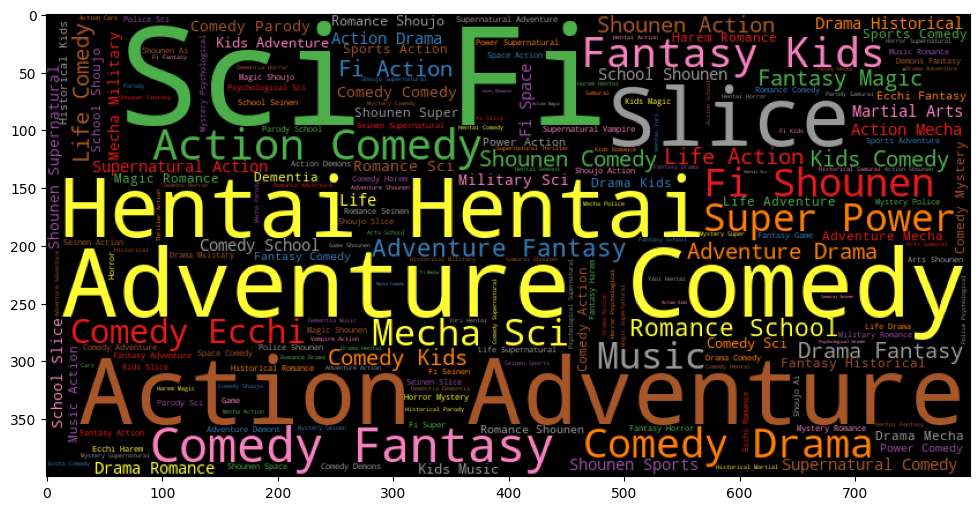

In [23]:
# CHECK MOST GENRE ANIME
wordcloud = WordCloud(width = 800, height = 400, stopwords=None, colormap='Set1').generate(text = anime_data['genre'].str.cat(sep=', '))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)

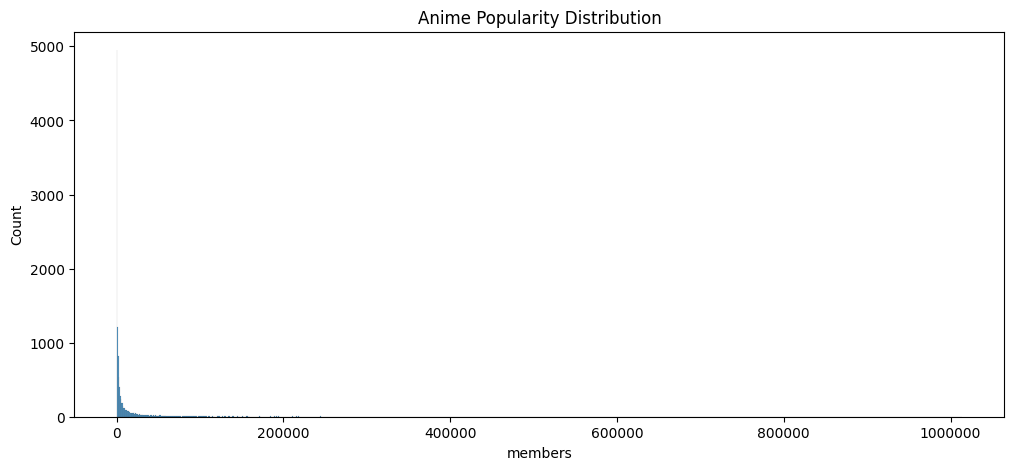

In [15]:
# CHECK ANIME POPULARITY DISTRIBUTION

plt.figure(figsize=(12,5))
sns.histplot(data= anime_data, x = 'members')
plt.title('Anime Popularity Distribution')
plt.ticklabel_format(style='plain', axis='x')  # so that the x-axis displays its original value (not scientific notation value)


In [21]:
# THE AVERAGE OF ANIME POPULARITY 

avg_popularity = np.mean(anime_data['members'])

print(f'The average popularity of anime is around {avg_popularity:.2f}')

The average popularity of anime is around 18181.67


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

There are anime with very big popularity and famous. Popularity value that exceeds 50000 is anime with big popularity. And the average for overall anime popularity is around ~18000



</div>

Text(0.5, 1.0, 'Anime Rating Distribution')

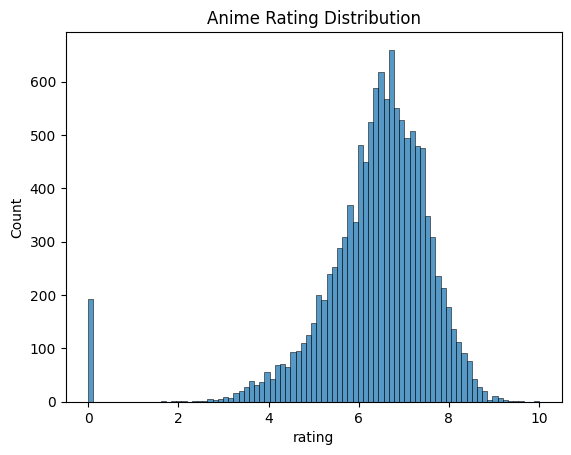

In [16]:
# CHECK RATING DISTRIBUTION

sns.histplot(data = anime_data, x = 'rating')
plt.title('Anime Rating Distribution')

Text(0.5, 1.0, 'Anime Episodes Distribution by 1 - 200 Episodes')

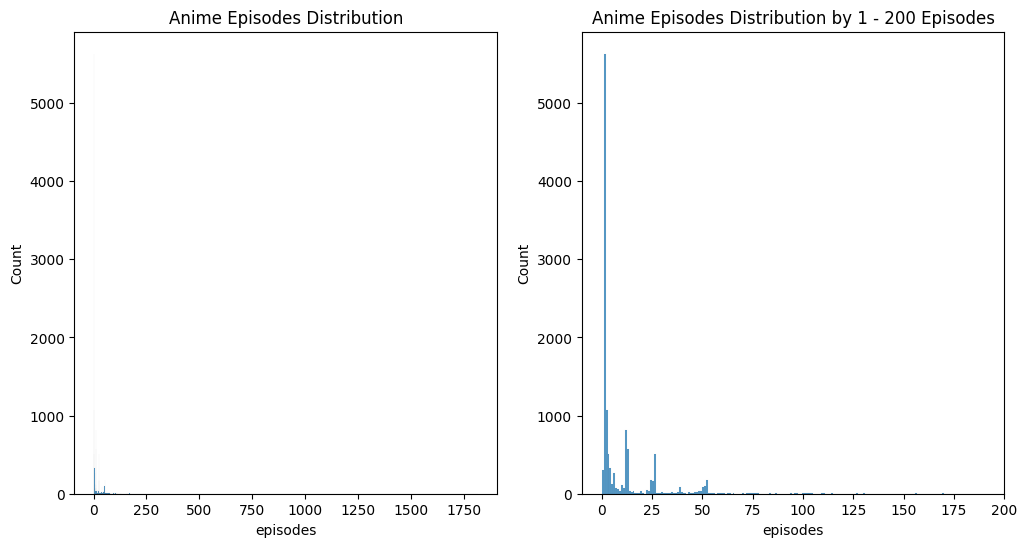

In [ ]:
# CHECK EPISODES DISTRIBUTION

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data = anime_data, x = 'episodes')
plt.title('Anime Episodes Distribution')

plt.subplot(1,2,2)
sns.histplot(data = anime_data, x = 'episodes')
plt.xlim([-10, 200])
plt.title('Anime Episodes Distribution Clipped to 200 Episodes')

In [24]:
avg_episodes = np.mean(anime_data['episodes'])
print(f'Average of Episodes Anime are : {avg_episodes} ')

Average of Episodes Anime are : 12.115661861074706 


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

Overall, the average anime episode is 12 episodes. There are also anime with more than 100 episodes and even more than 1000 episodes

</div>

## Bivariate Analaysis

Text(0.5, 1.0, 'Relationship Between Popularity and Rating')

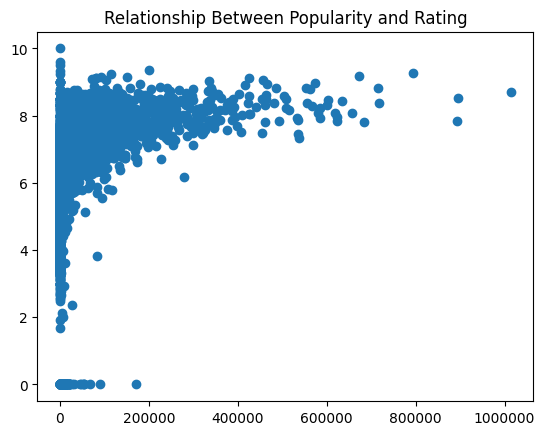

In [19]:
# DISPLAY RELATIONSHIP BETWEEN POPULARITY AND RATING

plt.scatter(x = anime_data['members'], y = anime_data['rating'])
plt.ticklabel_format(axis='x', style='plain')

plt.title('Relationship Between Popularity and Rating')

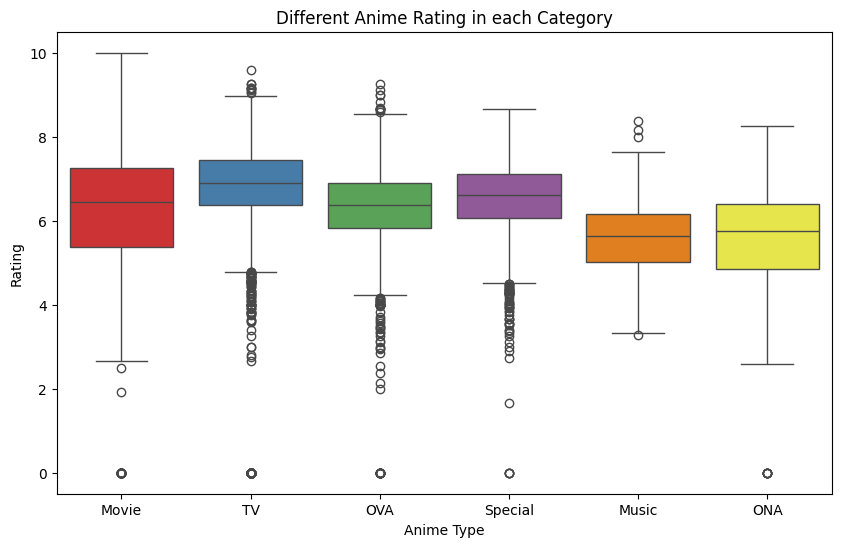

In [27]:
# DISPLAY DISTRIBUTION BETWEEN RATING AND ANIME CATEGORY

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=anime_data, palette='Set1', hue = 'type')
plt.title('Different Anime Rating in each Category')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.show()


Text(0.5, 1.0, 'Anime Episodes vs Rating')

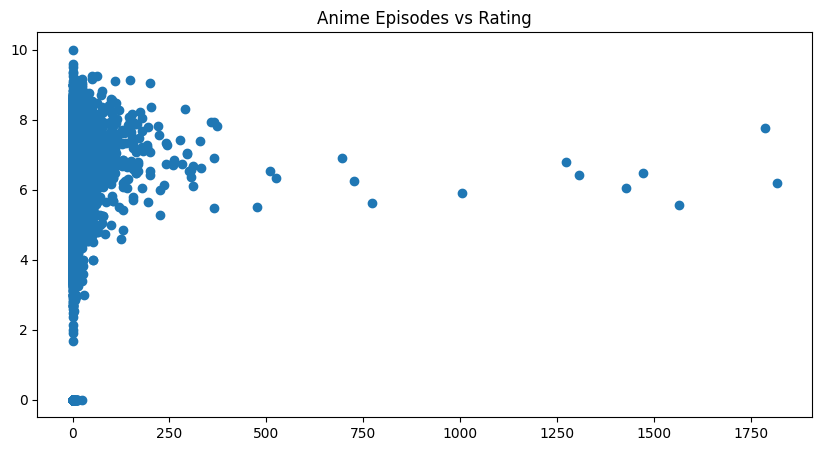

In [32]:
# DISPLAY RELATIONSHIP BETWEEN RATING AND EPISODES ANIME

plt.figure(figsize=(10,5))
plt.scatter(x = anime_data['episodes'], y = anime_data['rating'])
plt.title('Anime Episodes vs Rating')

Text(0.5, 1.0, 'Distribution Anime Episodes in different Category')

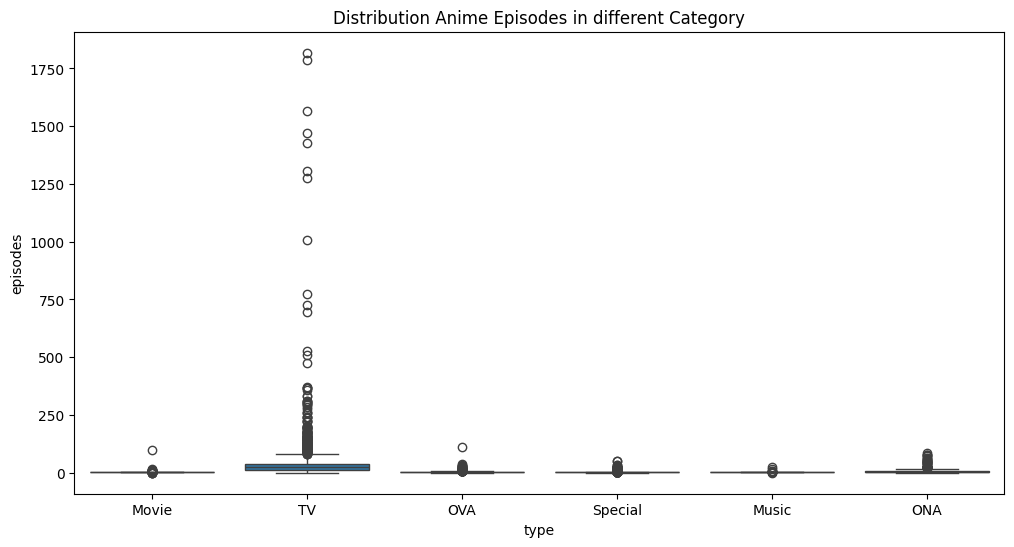

In [33]:
# DISPLAY DISTRIBUTION BETWEEN ANIME CATEGORY AND EPISODES

plt.figure(figsize=(12,6))
sns.boxplot(data = anime_data, x = 'type', y = 'episodes')
plt.title('Distribution Anime Episodes in different Category')

In [23]:
# AVERAGE OF ANIME EPISODES IN DIFFERENT CATEGORY

avg_episodes = anime_data.groupby(by = 'type')['episodes'].mean()
avg_episodes = pd.DataFrame(data = avg_episodes).reset_index()

avg_episodes

,type,episodes
0,Movie,1.095486
1,Music,1.129098
2,ONA,6.425954
3,OVA,2.381571
4,Special,2.555556
5,TV,34.011914


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

TV category is an anime with the most episodes among others

</div>

## Multivariate Analysis

In [ ]:
# BEFORE WE CONTINUE, WE NEED TO TRANSFORM CATEGORICAL COLUMNS FIRST TO NUMERICAL COLUMNS

# CHANGE EACH GENRE TO ONE-HOT ENCODING 
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(anime_data['genre_split'])

# CHANGE EACH MOVIE TO ONE-HOT ENCODING
type_encoded = pd.get_dummies(data = anime_data['type'])

# CHANGE EACH MOVIE TO LABEL ENCODING (OPTIONAL)
type_label_encoded = []

   # CHANGE EACH CATEGORY ANIME TO NUMERIC LABEL ENCODING
for category in anime_data['type']:
    if category == 'Movie':
        type_label_encoded.append(0)
    elif category == 'TV':
        type_label_encoded.append(1)
    elif category == 'OVA':
        type_label_encoded.append(2)
    elif category == 'Special':
        type_label_encoded.append(3)
    elif category == 'Music':
        type_label_encoded.append(4)
    else:
        type_label_encoded.append(5)

anime_data['type_encoded'] = type_label_encoded

# ------------------------------------------------------------------------------------

# CONVERT ENCODED GENRE TO DATAFRAME
genre_df = pd.DataFrame(data = genre_encoded, columns = mlb.classes_)


# MERGE DATAFRAME
new_anime_data = pd.concat((anime_data, genre_df, type_encoded), axis= 1)

new_anime_data

,anime_id,name,genre,type,episodes,rating,members,genre_split,type_encoded,Action,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"[Drama, Romance, School, Supernatural]",0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",1,1,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",1,1,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"[Sci-Fi, Thriller]",1,0,...,1,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",1,1,...,0,0,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,[Hentai],2,0,...,0,0,0,0,False,False,False,True,False,False
12204,5543,Under World,Hentai,OVA,1.0,4.28,183,[Hentai],2,0,...,0,0,0,0,False,False,False,True,False,False
12205,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,[Hentai],2,0,...,0,0,0,0,False,False,False,True,False,False
12206,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,[Hentai],2,0,...,0,0,0,0,False,False,False,True,False,False


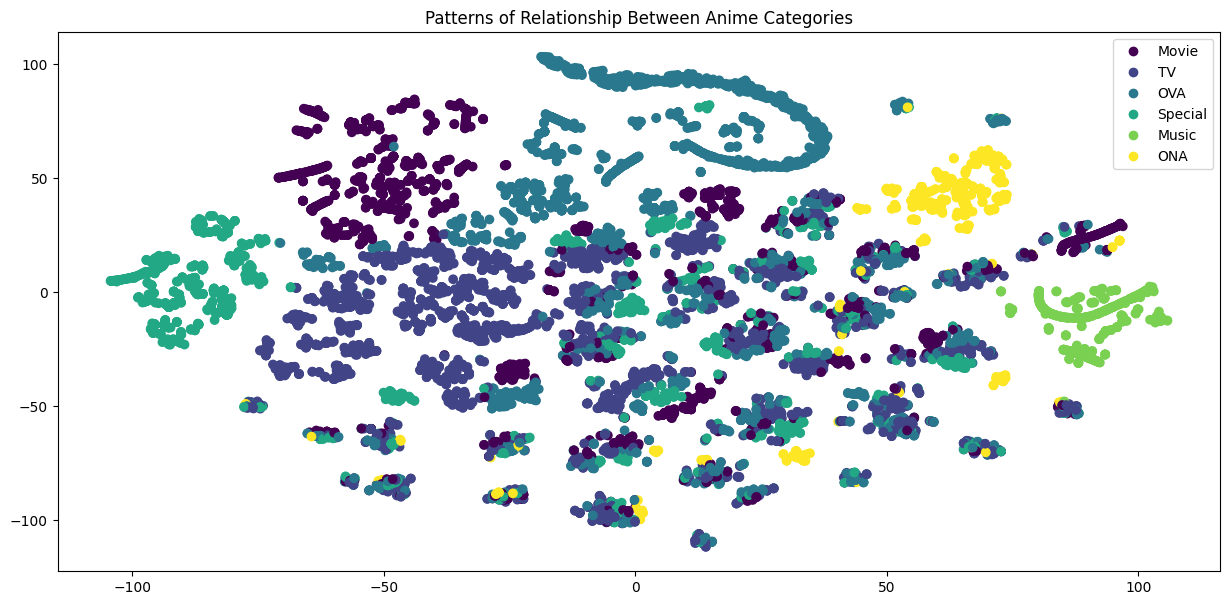

In [26]:
# FIND CLUSTERING RELATIONSHIP PATTERNS ANIME


# DETERMINES COLUMNS FOR WHICH U WANT TO FIND PATTERNS
cols = ['episodes', 'rating', 'members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']

# CHANGE ALL VALUES INTO THE SAME RANGE
zscore = StandardScaler()
anime_scaled = zscore.fit_transform(new_anime_data[cols])

# DIMENSION REDUCTION
tsne = TSNE(n_components= 2)
anime_reduced = tsne.fit_transform(anime_scaled)

# --------------------------------------------------------------------------------------------------------

# VISUALIZATION
plt.figure(figsize=(15,7))
scatter = plt.scatter(x = anime_reduced[:, 0], y = anime_reduced[:, 1], c = new_anime_data['type_encoded'])

plt.title('Patterns of Relationship Between Anime Categories')

# SHOW LEGEND
plt.legend(handles = scatter.legend_elements()[0], labels = ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])
plt.show()


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

we want to know the relationship between anime based on anime Type/Category using TSNE. <br>

From the visualization above, it shows that each data point that is close to each other, they have the same characteristics as each other. It can be seen that each category that is the same, the data points are close to each other... such as the categories anime music, ONA, Special and movie form a cluster. That means they have almost the same characteristics from each cluster.

**ok now we want display patterns relationship between selected anime**
</div>

C:\Users\aliff\AppData\Local\Temp\ipykernel_592\4135538021.py:47: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 6
  plt.legend(handles = scatter.legend_elements()[0], labels = ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])


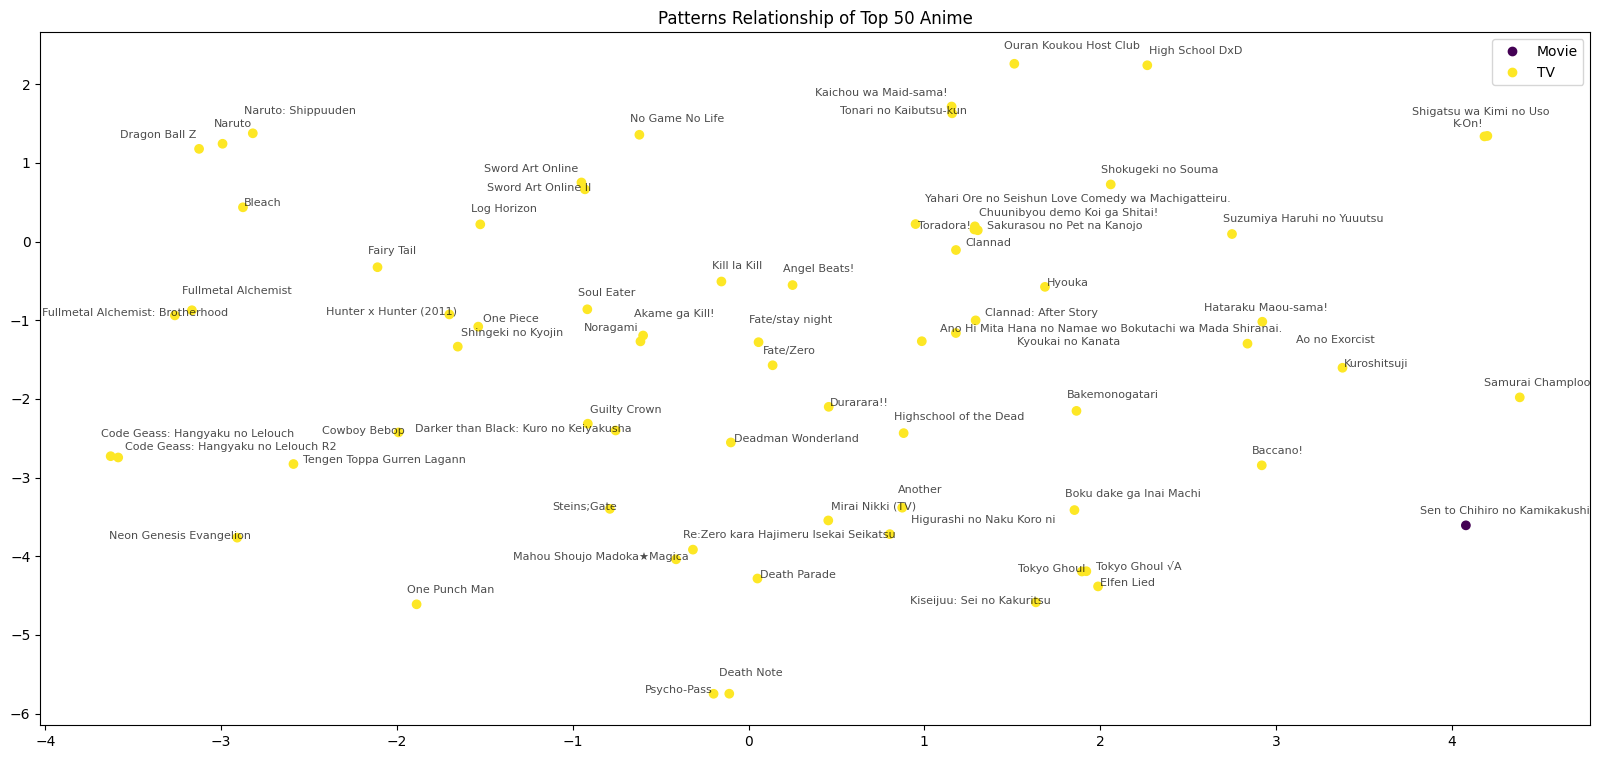

In [ ]:
# LETS SAY WE WANT TO SEE THE PATTERNS FOR THE MOST 50 POPULAR ANIME

popular_anime = new_anime_data.sort_values(by = 'members', ascending=False).reset_index(drop=True)
popular_anime = popular_anime.nlargest(n = 70, columns='members')


# DETERMINES COLUMNS FOR WHICH U WANT TO FIND PATTERNS
cols = ['episodes', 'rating', 'members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


# CHANGE ALL VALUES INTO THE SAME RANGE
zscore = StandardScaler()
anime_scaled_2 = zscore.fit_transform(popular_anime[cols])


# DIMENSION REDUCTION
tsne = TSNE(n_components= 2)
anime_reduced_2 = tsne.fit_transform(anime_scaled_2)


# --------------------------------------------------------------------------------------------------------

# VISUALIZATION
plt.figure(figsize=(20,9))
scatter = plt.scatter(x = anime_reduced_2[:, 0], y = anime_reduced_2[:, 1], c = popular_anime['type_encoded'])

plt.title('Patterns Relationship of Top 50 Anime')

# SHOW ANIME NAME FOR EACH DATA POINTS
texts = []
for i, txt in enumerate(popular_anime['name']):
    text = plt.text(anime_reduced_2[i, 0], anime_reduced_2[i, 1] + 0.1, txt, fontsize=8, alpha=0.7, ha='center')
    texts.append(text)

# Use adjustText to prevent overlap
adjust_text(texts)

# SHOW LEGEND
plt.legend(handles = scatter.legend_elements()[0], labels = ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])
plt.show()



<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

  From the visualization above, we visualize the TSNE of 50 famous anime. Each data point reflects the characteristics of an anime. Data points that are close together mean that the anime has almost the same characteristics (such as similar genres, ratings, members, episodes, types). And data points that are far apart mean that the anime has different characteristics (not the same).

For example, like the anime Naruto, Naruto Shippuden and Dragon Ball Z whose data points are close together. That means that the anime has similarities to each other.

</div>

# Anime Similarity

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


we will do anime similarities based on anime genre and type

</div>

In [28]:
# CREATE ANIME SIMILARITY BASED GENRE AND CATEGORY FEATURE


# CONCATENATE GENRE AND TYPE ENCODED
df_encoded = pd.concat((genre_df, type_encoded), axis=1)

# CALCULATE COSINE SIMILARITY BASED GENRE AND TYPE ANIME
similarity = cosine_similarity(X = df_encoded, Y = df_encoded)


# FUNCTION TO SEARCH SIMILAR ANIME
def anime_similarity(anime_name, top_n = 5):
    
    # GET INDEX OF ANIME NAME
    idx = anime_data[anime_data['name'] == anime_name].index[0]  # --> TAKE INDEX SCALAR VALUE   <------ JUST IGNORE THIS COOMENT IF U DONT UNDERSTAND

    # GET SIMILARITY SCORE BETWEEN SEARCHED ANIME AND OTHER ANIMES
    anime_scores = list(enumerate(similarity[idx]))   # ----> SEARCHED BY INDEX ANIME

    # SORT SIMILARITY SCORE BY DESCENDING
    anime_scores = sorted(anime_scores, key = lambda x : x[1], reverse= True)  

    #print('Index Target, Similarity Scores')
    #display(anime_scores[:3])  # THIS CONTAINS 1 LIST AND 2 TUPLE . THE FIRST TUPLE IS INDEX OF TARGETED ANIME , AND THE SECOND TUPLE IS SIMILARITY SCORE BETWEEN CURRENT ANIME AND TARGET ANIME

    # TAKE TOP_N MOST SIMILAR ANIME (INCLUDING HIMSELF)
    top_n_anime = anime_scores[: top_n + 1]

    #display(top_n_anime)

    return top_n_anime  # --> RETURN [ (INDEX OF TARGETED ANIME, SIMILAR SCORE BETWEEN CURRENT ANIME AND TARGET ANIME) ]


In [30]:
df_encoded

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,False,False,False,False,False,True
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,False,False,False,False,False,True
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,False,False,False,True,False,False


## Display Anime Similarity

In [33]:
# DISPLAY RECOMMENDATION ANIME BASED SIMILARITY OF GENRE AND TYPE

# DISPLAY TOP 10 ANIME SIMILAR WITH DORAEMON

search_anime = 'Doraemon'   # RECOMMEND ANIME SIMILAR TO DORAEMON
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['name', 'genre', 'type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with Doraemon


,name,genre,type,similar_score
1,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,0.925820
2,Saru Getchu: On Air 2nd,"Adventure, Comedy, Fantasy, Kids, Romance, Sho...",TV,0.925820
3,Saru Getchu: On Air,"Adventure, Comedy, Fantasy, Kids, Romance, Sho...",TV,0.925820
4,Kekkaishi,"Adventure, Comedy, Fantasy, Shounen",TV,0.912871
5,TaoTao Ehonkan Sekai Doubutsu Banashi,"Adventure, Comedy, Fantasy, Kids",TV,0.912871
6,Pokemon Housoukyoku,"Adventure, Comedy, Fantasy, Kids",TV,0.912871
7,Fushigi na Koala Blinky,"Adventure, Comedy, Fantasy, Kids",TV,0.912871
8,B-Densetsu! Battle Bedaman Enkon,"Adventure, Comedy, Kids, Shounen",TV,0.912871
9,B-Densetsu! Battle Bedaman,"Adventure, Fantasy, Kids, Shounen",TV,0.912871
10,Samurai Girl Real Bout High School,"Adventure, Comedy, Fantasy, Shounen",TV,0.912871


In [34]:
# DISPLAY TOP 10 ANIME SIMILAR WITH ONE PIECE

search_anime = 'One Piece'    # RECOMMEND ANIME SIMILAR TO ONE PIECE
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['name', 'genre', 'type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with One Piece


,name,genre,type,similar_score
1,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0.935414
2,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
3,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,0.875000
4,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,0.875000
5,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
6,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
7,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,0.875000
8,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
9,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,0.866025
10,Toriko,"Action, Adventure, Comedy, Fantasy, Shounen",TV,0.866025


In [35]:
# DISPLAY TOP 10 ANIME SIMILAR WITH Kimi no Na wa.


search_anime = 'Kimi no Na wa.'    # RECOMMEND ANIME SIMILAR TO Kimi no Na wa.
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['name', 'genre', 'type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with Kimi no Na wa.


,name,genre,type,similar_score
1,Aura: Maryuuin Kouga Saigo no Tatakai,"Comedy, Drama, Romance, School, Supernatural",Movie,0.912871
2,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,0.894427
3,Harmonie,"Drama, School, Supernatural",Movie,0.894427
4,Air Movie,"Drama, Romance, Supernatural",Movie,0.894427
5,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",Movie,0.800000
6,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,0.800000
7,Clannad Movie,"Drama, Fantasy, Romance, School",Movie,0.800000
8,Taifuu no Noruda,"Drama, School, Sci-Fi, Supernatural",Movie,0.800000
9,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",OVA,0.800000
10,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",TV,0.800000


In [36]:
# DISPLAY TOP 10 ANIME SIMILAR WITH Yasuji no Pornorama: Yacchimae!!


search_anime = 'Yasuji no Pornorama: Yacchimae!!'    # RECOMMEND ANIME SIMILAR TO Yasuji no Pornorama: Yacchimae!!	
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['name', 'genre', 'type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')

anime

Top 10 Anime who similar with Yasuji no Pornorama: Yacchimae!!


,name,genre,type,similar_score
1,Kanashimi no Belladonna,"Drama, Hentai",Movie,0.816497
2,Senya Ichiya Monogatari,"Fantasy, Hentai",Movie,0.816497
3,Cleopatra,"Hentai, Historical",Movie,0.816497
4,Blue Seagull,"Action, Hentai",Movie,0.816497
5,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,0.816497
6,Choujin Densetsu Urotsukidouji Movie,"Action, Demons, Drama, Hentai",Movie,0.632456
7,Choujin Densetsu Urotsukidouji 2,"Demons, Fantasy, Hentai, Horror, Sci-Fi",Movie,0.577350
8,Tsumiki no Ie,Drama,Movie,0.500000
9,Karigurashi no Arrietty,Fantasy,Movie,0.500000
10,Kingsglaive: Final Fantasy XV,Action,Movie,0.500000
